<a href="https://colab.research.google.com/github/organisciak/Scripting-Course/blob/master/labs/06-visualization-lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6

*Reminder - save your work. Go to File > Save a Copy in Drive to ensure that you have your work saved.*

As we move toward your final projects, we're also practicing our 'figure out new stuff' skills. Remember the high level tips: look at documentation in Colab, try auto-fill to see what methods exist, search Google, search Stack Overflow, and read the documentation for the library (i.e. at http://pandas.pydata.org/).

In [1]:
import pandas as pd

## Dataset: COVID-19  State-level statistics

Load this NYTimes dataset on Covid-19 statistics, per state, up to February 6, 2022. Details about the dataset are on [Github](hhttps://github.com/nytimes/covid-19-data/tree/d3314d4562aaf580d74130d807acff5e647606f9).

In [8]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/blob/d3314d/us-states.csv?raw=true')

# tell pandas to treat the date column as a date type
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

# add column for new cases, as well as a rolling average
data = data.sort_values(['state', 'date'])
data['newcases'] = data.groupby('state').cases.apply(lambda x: x - x.shift(1)).values
data['newcases_avg'] = data.groupby('state').newcases.apply(lambda x: x.rolling('14d', min_periods=1).mean()).values

# For the first day with cases, make new cases = cases
day1 = data['newcases'].isna()
data.loc[day1, 'newcases'] = data.loc[day1, 'cases']
data.loc[day1, 'newcases_avg'] = data.loc[day1, 'cases']
data['newcases'] = data['newcases'].astype(int)

# reset the index so that we can treat it as data (consistent with lecture)
data = data.reset_index()

data.sample(10)

,date,state,fips,cases,deaths,newcases,newcases_avg
13235,2021-02-24,Kentucky,21,404242,4686,1299,1228.500000
3928,2020-10-03,Colorado,8,72929,2071,475,588.214286
6550,2020-03-30,Florida,12,5695,72,752,396.714286
23331,2021-10-07,New Mexico,35,257970,4856,1023,706.785714
27317,2021-03-11,Oklahoma,40,430944,4701,694,627.714286
11616,2020-07-25,Iowa,19,41886,826,452,513.642857
30240,2021-06-25,Rhode Island,44,152514,2728,13,21.500000
36540,2021-03-25,Washington,53,361300,5286,1097,759.928571
15104,2020-07-07,Maryland,24,70986,3266,489,384.571429
6364,2021-09-03,District of Columbia,11,55918,1162,200,184.000000


**Questions**

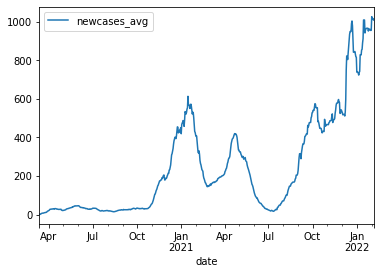

Q1) Which State is represented in the above plot (*4pts*):
  - Wyoming
  - Oregon
  - Maine
  - Illinois

In [4]:
q1_answer = "" #@param ["", "a) Wyoming", "b) Oregon", "c) Maine", "d) Illinois"]

Q2) Write code to recreate the above plot, but giving the plot a sensible title, like below. This will require a skill not mentioned in class.  (*6pts*)

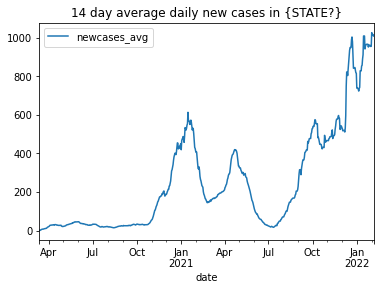

In [ ]:
# Answer-Q2


Q3) Modify the above code to add a y-axis label, *New Cases (14 day average)*. You can't change the axis labels within `plot()`. However, you can set the output of a `plot()` method to a variable, and that variable will have a method to *set* the *y-axis*.  (*7pts*)


In [ ]:
# Answer-Q3


Q4) You can get the latest day's numbers as started in the answer cell below. Complete the code to plot a histogram of the new cases across all states. (*5pts*)

In [ ]:
# Answer-Q4
lastday = data[data.date == data.date.max()]


Q5) Which State/day has the highest single day new case count? (*5pts*)
  - Florida on June 4th, 2021
  - California on January 10th, 2022
  - California on January 22nd, 2022

(You don't need to focus on these three in particular, look at all options and one of these is the answer).

In [ ]:
q5_answer = "" #@param ["", "a) Florida on June 4th, 2021", "b) California on January 10th, 2022", "c) California on January 22nd, 2022"]



Q6) To one precision point (e.g. XX.X), fill in the blanks for mean new daily cases throughout the entire span of time:  (*6pts*)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>newcases</th>
    </tr>
    <tr>
      <th>state</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Alabama</th>
      <td>1785.1</td>
    </tr>
    <tr>
      <th>Alaska</th>
      <td>320.8</td>
    </tr>
    <tr>
      <th>American Samoa</th>
      <td>***A***</td>
    </tr>
    <tr>
      <th>Arizona</th>
      <td>2581.5</td>
    </tr>
    <tr>
      <th>Arkansas</th>
      <td>***B***</td>
    </tr>
    <tr>
      <th>California</th>
      <td>11588.7</td>
    </tr>
    <tr>
      <th>Colorado</th>
      <td>***C***</td>
    </tr>
    <tr>
      <th>Connecticut</th>
      <td>1007.3</td>
    </tr>
  </tbody>
</table>

In [ ]:
q6a_answer = 0 #@param {type:"number"} 
q6b_answer = 0 #@param {type:"number"} 
q6c_answer = 0 #@param {type:"number"} 

Q7) Described in point-form steps, how might you get the per-capita (or per-100k-people) case counts? I'm interested in how you think through the solution, code isn't necessary.  (*7pts*)

In [ ]:
q7_answer = '''

Type your answer here (the triple quotes tell Python that this is a 
multi-line string, by the way, so keep those at the start and end)


'''



Q8) Read the Seaborn documentation for FacetGrid (docs at https://seaborn.pydata.org/), and write the code to mimic the following chart. The first step will be to truncate the data to just the first 5819 rows - `truncated = data[:5819]` - do the rest. (For simplicity, don't worry about adjusting the x-axis date labels, though you're welcome to do it to challenge yourself). (*10pts*)

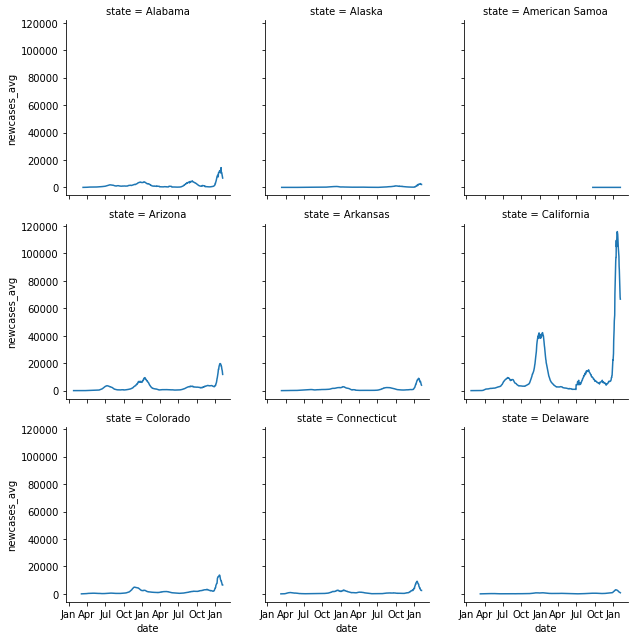

In [ ]:
# Answer-Q8


# Submission Instructions

In [ ]:
#@markdown ### First, Enter your name for grading
my_name = "" #@param { type:'string' }

#@markdown _Have you saved your work for yourself? Don't forget to Save a Copy in Drive so that you have your progress._

In [ ]:
#@markdown ### Second, check your work:

#@markdown - have you answered all the questions?
#@markdown - Does this notebook run from top to bottom?
#@markdown     - Go to "Runtime > Restart and run all..." to check. Do all the cells run, to the very bottom, or is there a cell in the middle with an error?
#@markdown - Have you completed all the answers where you entered code, keeping the `# Answer-Qx` line at the start of those cells?

#@markdown *A lab that the professor has to fix manually will lose 10pts - run the checks!*

#@markdown ### Finally, submit it

#@markdown - Download the file with "File > Download .ipynb" and submit it to the Canvas assignment page.